<a href="https://colab.research.google.com/github/miraculusik/tensorflow-deep-learning-practices/blob/main/time_series_forecasting_in_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi -L

GPU 0: Tesla K80 (UUID: GPU-321fb894-0357-a53a-79ee-e6ff3c982916)


In [2]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv

--2021-10-19 13:43:22--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 178509 (174K) [text/plain]
Saving to: ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’

BTC_USD_2013-10-01_ 100%[===================>] 174.33K  --.-KB/s    in 0.02s   

2021-10-19 13:43:22 (7.43 MB/s) - ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’ saved [178509/178509]



In [3]:
import pandas as pd

df = pd.read_csv("BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv",
                 parse_dates=["Date"],
                 index_col=["Date"])
df.head()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.65499,124.30466,124.75166,122.56349
2013-10-02,BTC,125.45500,123.65499,125.75850,123.63383
2013-10-03,BTC,108.58483,125.45500,125.66566,83.32833
2013-10-04,BTC,118.67466,108.58483,118.67500,107.05816
2013-10-05,BTC,121.33866,118.67466,121.93633,118.00566


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2787 entries, 2013-10-01 to 2021-05-18
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Currency             2787 non-null   object 
 1   Closing Price (USD)  2787 non-null   float64
 2   24h Open (USD)       2787 non-null   float64
 3   24h High (USD)       2787 non-null   float64
 4   24h Low (USD)        2787 non-null   float64
dtypes: float64(4), object(1)
memory usage: 130.6+ KB


In [5]:
# How many days are there
len(df)

2787

In [6]:
bitcoin_prices = pd.DataFrame(df["Closing Price (USD)"]).rename(columns={"Closing Price (USD)": "Price"})
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


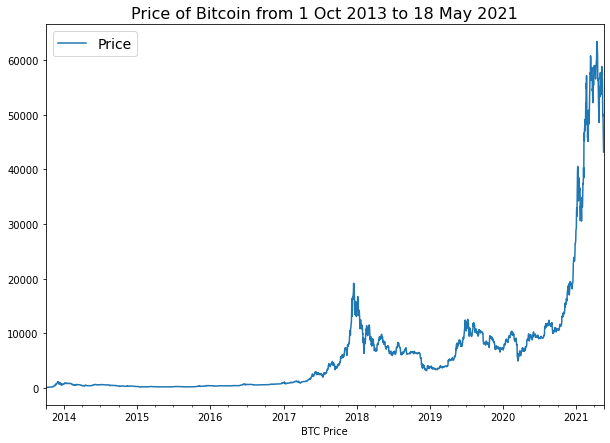

In [7]:
import matplotlib.pyplot as plt

bitcoin_prices.plot(figsize=(10,7))
plt.xlabel("BTC Price")
plt.title("Price of Bitcoin from 1 Oct 2013 to 18 May 2021", fontsize=16)
plt.legend(fontsize=14);

In [8]:
# Importing time series data with Python's CSV module
import csv
from datetime import datetime
timesteps = []
btc_price = []
with open("/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv") as f:
  csv_reader = csv.reader(f, delimiter=",")
  next(csv_reader)
  for line in csv_reader:
    timesteps.append(datetime.strptime(line[1], "%Y-%m-%d"))
    btc_price.append(float(line[2]))

timesteps[:10], btc_price[:10]

([datetime.datetime(2013, 10, 1, 0, 0),
  datetime.datetime(2013, 10, 2, 0, 0),
  datetime.datetime(2013, 10, 3, 0, 0),
  datetime.datetime(2013, 10, 4, 0, 0),
  datetime.datetime(2013, 10, 5, 0, 0),
  datetime.datetime(2013, 10, 6, 0, 0),
  datetime.datetime(2013, 10, 7, 0, 0),
  datetime.datetime(2013, 10, 8, 0, 0),
  datetime.datetime(2013, 10, 9, 0, 0),
  datetime.datetime(2013, 10, 10, 0, 0)],
 [123.65499,
  125.455,
  108.58483,
  118.67466,
  121.33866,
  120.65533,
  121.795,
  123.033,
  124.049,
  125.96116])

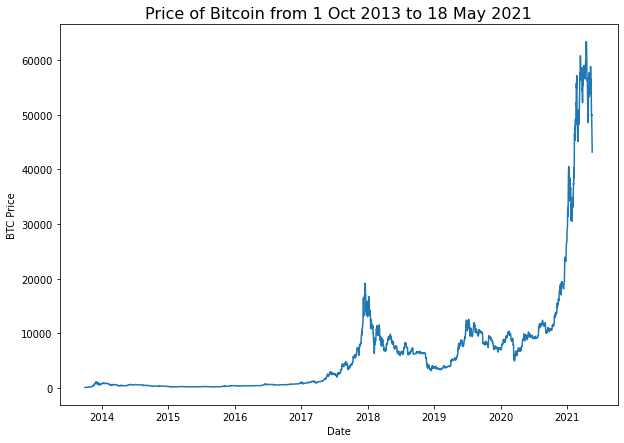

In [9]:
# Plot from CSV
plt.figure(figsize=(10,7))
plt.plot(timesteps, btc_price)
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.title("Price of Bitcoin from 1 Oct 2013 to 18 May 2021", fontsize=16);

In [10]:
timesteps = bitcoin_prices.index.to_numpy()
prices = bitcoin_prices["Price"].to_numpy()

In [11]:
split_size = int(0.8*len(prices))

X_train, y_train = timesteps[:split_size], prices[:split_size]
X_test, y_test =  timesteps[split_size:], prices[split_size:]

len(X_train), len(y_train), len(X_test), len(y_test)

(2229, 2229, 558, 558)

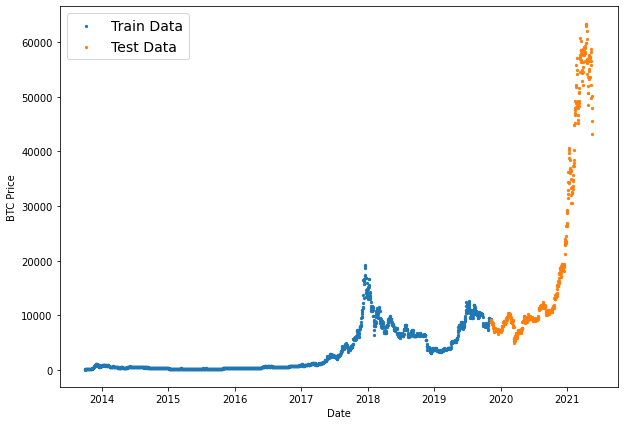

In [12]:
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, s=5, label="Train Data")
plt.scatter(X_test, y_test, s=5, label="Test Data")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.legend(fontsize=14)
plt.show()

In [13]:
# Create a function to plot time series data

def plot_time_series(timesteps, values, format=".", start=0, end=None, label=None):

  plt.plot(timesteps[start:end], values[start:end], format, label=label)
  plt.xlabel("Time")
  plt.ylabel("BTC Price")
  if label:
    plt.legend(fontsize=14)
  plt.grid(True)

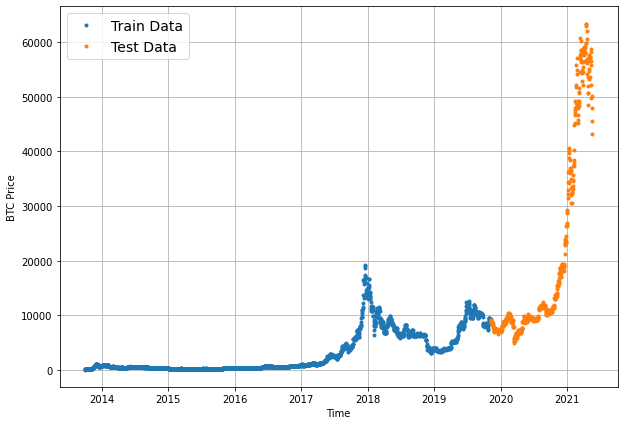

In [14]:
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_train, values=y_train, label="Train Data")
plot_time_series(timesteps=X_test, values=y_test, label="Test Data")

# Modelling Experiments

- **horizon** = number of timesteps to predict into feature
- **window** = number of timesteps from past used to predict **horizon**

# Model 0: Naive forecast (baseline)

In [15]:
naive_forecast = y_test[:-1]
naive_forecast[:10], naive_forecast[-10:]

(array([9226.48582088, 8794.35864452, 8798.04205463, 9081.18687849,
        8711.53433917, 8760.89271814, 8749.52059102, 8656.97092235,
        8500.64355816, 8469.2608989 ]),
 array([57107.12067189, 58788.20967893, 58102.19142623, 55715.54665129,
        56573.5554719 , 52147.82118698, 49764.1320816 , 50032.69313676,
        47885.62525472, 45604.61575361]))

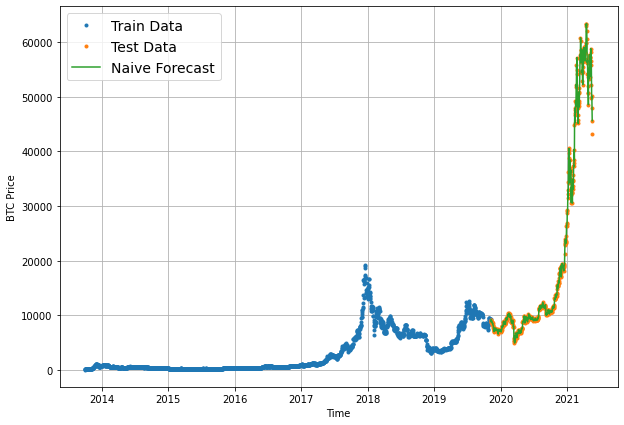

In [16]:
plt.figure(figsize=(10,7))

plot_time_series(timesteps=X_train, values=y_train, label="Train Data")
plot_time_series(timesteps=X_test, values=y_test, label="Test Data")
plot_time_series(timesteps=X_test[1:], values=naive_forecast, format="-", label="Naive Forecast")

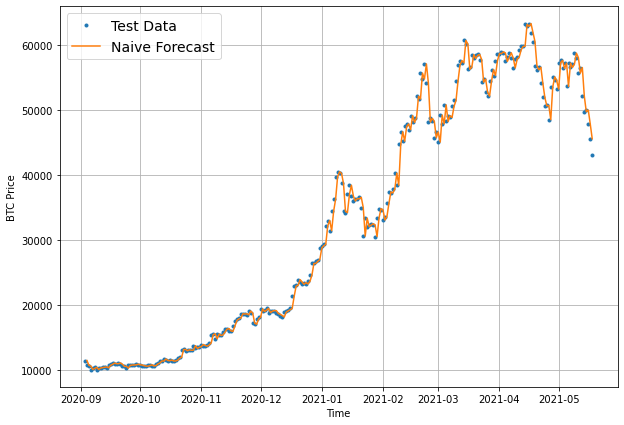

In [17]:
plt.figure(figsize=(10, 7))
offset = 300
plot_time_series(timesteps=X_test, values=y_test, start=offset, label="Test Data")
plot_time_series(timesteps=X_test[1:], values=naive_forecast, start=offset, format="-", label="Naive Forecast")

In [18]:
import tensorflow as tf

In [19]:
def mean_absolute_scaled_error(y_true, y_pred):

  mae = tf.reduce_mean(tf.abs(y_true - y_pred))
  
  mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:] - y_true[:-1]))

  return mae/mae_naive_no_season

In [20]:
def evaluate_preds(y_true, y_pred):

  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)

  return {"mae":mae.numpy(),
          "mse":mse.numpy(),
          "rmse":rmse.numpy(),
          "mape":mape.numpy(),
          "mzse":mase.numpy()}

In [21]:
naive_results = evaluate_preds(y_true=y_test[1:],
                               y_pred=naive_forecast)
naive_results

{'mae': 567.9802,
 'mape': 2.516525,
 'mse': 1147547.0,
 'mzse': 0.99957,
 'rmse': 1071.2362}

In [22]:
# Find average price of Bitcoin in test dataset
tf.reduce_mean(y_test).numpy()

20056.632963737226

# Windowing Dataset

In [23]:
HORIZON = 1
WINDOW_SIZE = 7

In [24]:
def get_labelled_windows(x, horizon = 1):

  return x[:, :-horizon], x[:, -horizon:]

In [25]:
import numpy as np

def make_windows(x, window_size=7, horizon=1):
  
  window_step = np.expand_dims(np.arange(window_size+horizon), axis=0)

  window_indexes = window_step + np.expand_dims(np.arange(len(x)-(window_size+horizon-1 )), axis=0).T

  windowed_array = x[window_indexes]

  windows, labels = get_labelled_windows(windowed_array, horizon=horizon)

  return windows, labels

In [26]:
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2780, 2780)

In [27]:
for i in range(3):
  print(f"Window: {full_windows[i]} -> Label: {full_labels[i]}")

Window: [123.65499 125.455   108.58483 118.67466 121.33866 120.65533 121.795  ] -> Label: [123.033]
Window: [125.455   108.58483 118.67466 121.33866 120.65533 121.795   123.033  ] -> Label: [124.049]
Window: [108.58483 118.67466 121.33866 120.65533 121.795   123.033   124.049  ] -> Label: [125.96116]


In [28]:
def make_train_test_split(windows, labels, test_split=0.2):
  split_size = int(len(windows)* (1-test_split))
  train_windows = windows[:split_size]
  train_labels = labels[:split_size]
  test_windows = windows[split_size:]
  test_labels = labels[split_size:]

  return train_windows, test_windows, train_labels, test_labels


In [29]:
train_windows, test_windows,  train_labels, test_labels = make_train_test_split(full_windows, full_labels)

len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2224, 556, 2224, 556)

In [30]:
train_windows[:5], train_labels[:5]

(array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
         121.795  ],
        [125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ,
         123.033  ],
        [108.58483, 118.67466, 121.33866, 120.65533, 121.795  , 123.033  ,
         124.049  ],
        [118.67466, 121.33866, 120.65533, 121.795  , 123.033  , 124.049  ,
         125.96116],
        [121.33866, 120.65533, 121.795  , 123.033  , 124.049  , 125.96116,
         125.27966]]), array([[123.033  ],
        [124.049  ],
        [125.96116],
        [125.27966],
        [125.9275 ]]))

In [31]:
np.array_equal(np.squeeze(train_labels[:-HORIZON-1]), y_train[WINDOW_SIZE:])

True

# Make modelling checkpoint

In [32]:
import os 

def create_model_checkpoint(model_name, save_path="model_experiments"):

  return tf.keras.callbacks.ModelCheckpoint(os.path.join(save_path, model_name),
                                            verbose=0,
                                            save_best_only=True)

# Model 1: Dense model (HORIZON = 1, WINDOW_SIZE = 7)

In [33]:
import tensorflow as tf
from tensorflow.keras import layers

tf.random.set_seed(42)
# Buil model
model_1 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON)
], name="model_1_dense")

# Compile 
model_1.compile(loss="mae",
                optimizer = tf.keras.optimizers.Adam())

# Train
model_1.fit(train_windows,
            train_labels,
            epochs =100,
            verbose=1,
            batch_size=128,
            validation_data = (test_windows, test_labels),
            callbacks = [create_model_checkpoint(model_name=model_1.name)])

Epoch 1/100
18/18 [==============================] - 3s 12ms/step - loss: 780.3455 - val_loss: 2279.6526
INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets
Epoch 2/100
18/18 [==============================] - 0s 4ms/step - loss: 247.6756 - val_loss: 1005.9991
INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets
Epoch 3/100
18/18 [==============================] - 0s 4ms/step - loss: 188.4116 - val_loss: 923.2862
INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets
Epoch 4/100
18/18 [==============================] - 0s 4ms/step - loss: 169.4340 - val_loss: 900.5872
INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets
Epoch 5/100
18/18 [==============================] - 0s 4ms/step - loss: 165.0895 - val_loss: 895.2238
INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets
Epoch 6/100
18/18 [==============================] - 0s 5ms/step - loss: 158.5210 - val_loss: 855.1982
INFO:tens

In [34]:
model_1.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 585.9762


585.9761962890625

In [35]:
model_1 = tf.keras.models.load_model("model_experiments/model_1_dense/")
model_1.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 568.9512


568.951171875

In [36]:
model_1_preds = tf.squeeze(model_1.predict(test_windows))
model_1_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8861.711, 8769.886, 9015.71 , 8795.517, 8723.809, 8730.11 ,
       8691.95 , 8502.054, 8460.961, 8516.547], dtype=float32)>

In [37]:
model_1_results = evaluate_preds(tf.squeeze(test_labels), model_1_preds)
model_1_results

{'mae': 568.95123,
 'mape': 2.5448983,
 'mse': 1171744.0,
 'mzse': 0.9994897,
 'rmse': 1082.4713}

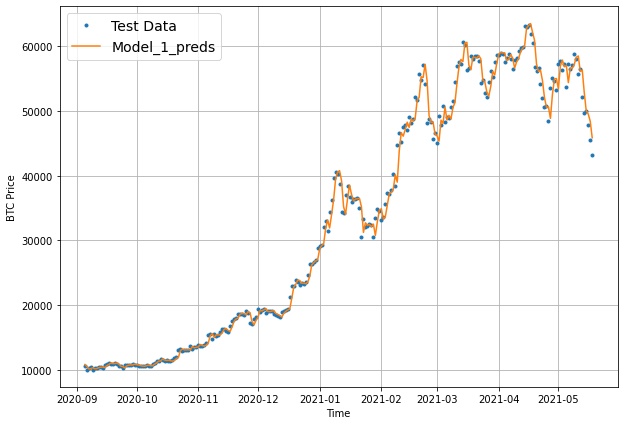

In [38]:
plt.figure(figsize=(10,7))
offset = 300
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, label="Test Data")
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_1_preds, start=offset, format="-", label="Model_1_preds")

# Model 2: Dense (HORIZON = 1, WINDOW_SIZE=30)

In [39]:
HORIZON = 1
WINDOW_SIZE = 30

In [40]:
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2757, 2757)

In [41]:
train_windows, test_windows, train_labels, test_labels = make_train_test_split(full_windows, full_labels)

len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2205, 552, 2205, 552)

In [42]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON)
], name="model_2_dense")

model_2.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

model_2.fit(train_windows,
            train_labels,
            epochs=100,
            batch_size=128,
            verbose=0,
            validation_data = (test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_2.name)])

INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: mod

In [43]:
model_2.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 608.9615


608.9614868164062

In [44]:
model_2 = tf.keras.models.load_model("model_experiments/model_2_dense/")
model_2.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 608.9615


608.9614868164062

In [45]:
model_2_preds = tf.squeeze(model_2.predict(test_windows))
model_2_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8946.987 , 8967.846 , 8820.251 , 8615.828 , 8485.796 , 8384.62  ,
       8307.779 , 8171.7837, 8217.465 , 7839.1475], dtype=float32)>

In [46]:
model_2_results = evaluate_preds(tf.squeeze(test_labels),
                                 model_2_preds)
model_2_results

{'mae': 608.9615,
 'mape': 2.7693386,
 'mse': 1281438.8,
 'mzse': 1.0644706,
 'rmse': 1132.0065}

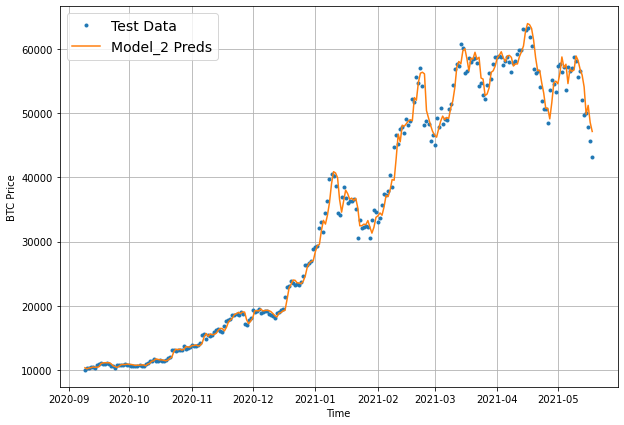

In [47]:
plt.figure(figsize=(10,7))
offset = 300

plot_time_series(timesteps= X_test[-len(test_windows):], values=test_labels, start=offset, label="Test Data")
plot_time_series(timesteps= X_test[-len(test_windows):], values=model_2_preds, format="-", start=offset, label="Model_2 Preds")

# Model 3: Dense (HORIZON = 7, WINDOW_SIZE = 30)

In [48]:
HORIZON = 7
WINDOW_SIZE = 30

In [49]:
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2751, 2751)

In [50]:
train_windows, test_windows, train_labels, test_labels = make_train_test_split(full_windows, full_labels)

len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2200, 551, 2200, 551)

In [51]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON)
], name="model_3_dense")

model_3.compile(loss="mae",
                optimizer= tf.keras.optimizers.Adam())

model_3.fit(train_windows,
            train_labels,
            epochs=300,
            verbose =0,
            validation_data = (test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_3.name)])

INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: mod

In [52]:
model_3.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 1329.7469


1329.7469482421875

In [53]:
model_3 = tf.keras.models.load_model("model_experiments/model_3_dense/")
model_3.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 1151.9619


1151.9619140625

In [54]:
model_3_preds = tf.squeeze(model_3.predict(test_windows))
model_3_preds[:10]

<tf.Tensor: shape=(10, 7), dtype=float32, numpy=
array([[9357.851 , 9311.77  , 9294.004 , 9362.915 , 9416.711 , 9495.074 ,
        9464.448 ],
       [8934.015 , 8992.781 , 8994.258 , 9039.17  , 9093.806 , 9173.864 ,
        9141.198 ],
       [8832.83  , 8857.781 , 8894.978 , 8996.882 , 9006.228 , 9061.955 ,
        8979.497 ],
       [9071.1875, 9051.324 , 9118.698 , 9195.139 , 9260.373 , 9224.138 ,
        9182.822 ],
       [8981.125 , 8929.798 , 8973.023 , 9027.262 , 9071.876 , 9050.647 ,
        8937.331 ],
       [8958.217 , 8929.778 , 8962.886 , 8991.069 , 9015.554 , 8988.356 ,
        8867.06  ],
       [8904.638 , 8889.872 , 8955.449 , 8924.338 , 8964.292 , 8905.06  ,
        8790.596 ],
       [8752.389 , 8722.906 , 8817.132 , 8811.469 , 8766.442 , 8762.491 ,
        8658.527 ],
       [8529.675 , 8555.438 , 8546.868 , 8615.658 , 8591.426 , 8606.756 ,
        8483.97  ],
       [8473.3545, 8457.881 , 8490.859 , 8499.397 , 8533.434 , 8531.651 ,
        8469.155 ]], dtype=floa

In [55]:
def evaluate_preds(y_true, y_pred):
  
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)

  if mae.ndim >0: # if mae score is not a scalar
    mae = tf.reduce_mean(mae)
    mse = tf.reduce_mean(mse)
    rmse = tf.reduce_mean(rmse)
    mape = tf.reduce_mean(mape)
    mase = tf.reduce_mean(mase)

  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}



In [56]:
model_3_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred = model_3_preds)

model_3_results

{'mae': 1151.9619,
 'mape': 5.3765182,
 'mase': 2.0498521,
 'mse': 4640780.0,
 'rmse': 1333.3016}

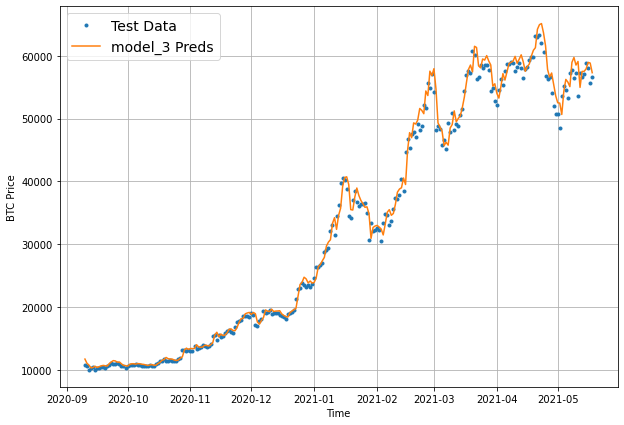

In [57]:
plt.figure(figsize=(10, 7))
offset =300

plot_time_series(X_test[-len(test_windows):], test_labels[:,0], start=300, label="Test Data")
plot_time_series(X_test[-len(test_windows):], tf.reduce_mean(model_3_preds, axis=1), format="-", start=300, label="model_3 Preds")

In [58]:
test_labels.shape

(551, 7)

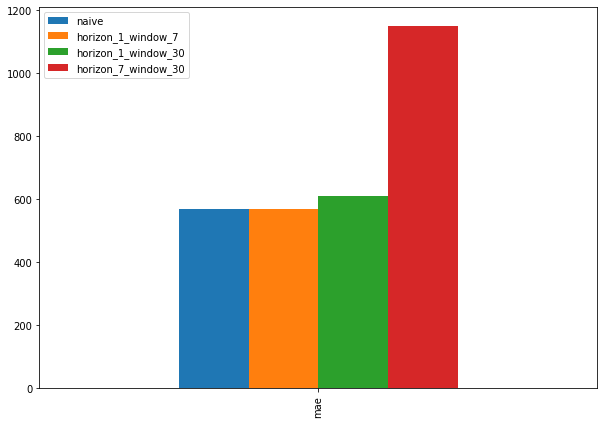

In [59]:
pd.DataFrame({"naive": naive_results["mae"],
              "horizon_1_window_7": model_1_results["mae"],
              "horizon_1_window_30": model_2_results["mae"],
              "horizon_7_window_30": model_3_results["mae"]}, index=["mae"]).plot(kind="bar", figsize=(10,7));

# Model 4: Conv1D

In [60]:
HORIZON = 1
WINDOW_SIZE = 7

In [61]:
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2780, 2780)

In [62]:
train_windows, test_windows, train_labels, test_labels = make_train_test_split(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2224, 556, 2224, 556)

In [63]:
tf.random.set_seed(42)

model_4 = tf.keras.Sequential([
  layers.Lambda(lambda x: tf.expand_dims(x, axis=1)),
  layers.Conv1D(filters=128, kernel_size=5, padding="causal", activation="relu"),
  layers.Dense(HORIZON)
], name="model_4_conv1D")

model_4.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

model_4.fit(train_windows,
            train_labels,
            epochs=100,
            batch_size=128,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_4.name)])

INFO:tensorflow:Assets written to: model_experiments/model_4_conv1D/assets
INFO:tensorflow:Assets written to: model_experiments/model_4_conv1D/assets
INFO:tensorflow:Assets written to: model_experiments/model_4_conv1D/assets
INFO:tensorflow:Assets written to: model_experiments/model_4_conv1D/assets
INFO:tensorflow:Assets written to: model_experiments/model_4_conv1D/assets
INFO:tensorflow:Assets written to: model_experiments/model_4_conv1D/assets
INFO:tensorflow:Assets written to: model_experiments/model_4_conv1D/assets
INFO:tensorflow:Assets written to: model_experiments/model_4_conv1D/assets
INFO:tensorflow:Assets written to: model_experiments/model_4_conv1D/assets
INFO:tensorflow:Assets written to: model_experiments/model_4_conv1D/assets
INFO:tensorflow:Assets written to: model_experiments/model_4_conv1D/assets
INFO:tensorflow:Assets written to: model_experiments/model_4_conv1D/assets
INFO:tensorflow:Assets written to: model_experiments/model_4_conv1D/assets
INFO:tensorflow:Assets wr

In [64]:
model_4.summary()

Model: "model_4_conv1D"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda (Lambda)              (None, 1, 7)              0         
_________________________________________________________________
conv1d (Conv1D)              (None, 1, 128)            4608      
_________________________________________________________________
dense_6 (Dense)              (None, 1, 1)              129       
Total params: 4,737
Trainable params: 4,737
Non-trainable params: 0
_________________________________________________________________


In [65]:
model_4 = tf.keras.models.load_model("model_experiments/model_4_conv1D/")
model_4.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 4ms/step - loss: 570.8284


570.8284301757812

In [66]:
model_4_preds = tf.squeeze(model_4.predict(test_windows))
model_4_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8851.465, 8754.47 , 8983.928, 8759.672, 8703.628, 8708.294,
       8661.668, 8494.839, 8435.316, 8492.114], dtype=float32)>

In [67]:
model_4_results = evaluate_preds(tf.squeeze(test_labels),
                                 model_4_preds)
model_4_results

{'mae': 570.8284,
 'mape': 2.5593357,
 'mase': 1.0027875,
 'mse': 1176671.2,
 'rmse': 1084.7448}

In [68]:
model_4_results

{'mae': 570.8284,
 'mape': 2.5593357,
 'mase': 1.0027875,
 'mse': 1176671.2,
 'rmse': 1084.7448}

# Model 5: RNN (LSTM)

In [69]:
tf.random.set_seed(42)

inputs = layers.Input(shape=(WINDOW_SIZE))
x = layers.Lambda(lambda x: tf.expand_dims(x, axis=1))(inputs)
x = layers.LSTM(128, activation="relu")(x)
output = layers.Dense(HORIZON)(x)

model_5 = tf.keras.Model(inputs, output, name="model_5_lstm")

model_5.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

model_5.fit(train_windows,
            train_labels,
            epochs=100,
            verbose=0,
            batch_size=128,
            validation_data = (test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_5.name)])

INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets
INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets
INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets
INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets
INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets
INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets
INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets
INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets
INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets
INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets
INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets
INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets
INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets
INFO:tensorflow:Assets written to: model_experiment

In [70]:
model_5 = tf.keras.models.load_model("model_experiments/model_5_lstm")
model_5.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 596.6447


596.6446533203125

In [71]:
model_5_preds = tf.squeeze(model_5.predict(test_windows))
model_5_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8991.225, 8823.2  , 9009.359, 8847.859, 8742.254, 8788.655,
       8744.746, 8552.568, 8514.823, 8542.873], dtype=float32)>

In [72]:
model_5_results = evaluate_preds(tf.squeeze(test_labels),
                                  model_5_preds)
model_5_results

{'mae': 596.64465,
 'mape': 2.6838453,
 'mase': 1.0481395,
 'mse': 1273486.9,
 'rmse': 1128.4888}

# Make Multivariate time series

In [73]:
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [74]:
block_reward_1 = 50 # 3 January 2009
block_reward_2 = 25 # 28 November 2012
block_reward_3 = 12.5 # 9 July 2016
block_reward_4 = 6.25 # 11 May 2020

block_reward_2_datetime = np.datetime64("2012-11-28")
block_reward_3_datetime = np.datetime64("2016-07-09")
block_reward_4_datetime = np.datetime64("2020-05-11")

In [75]:
block_reward_2_days = (block_reward_3_datetime - bitcoin_prices.index[0]).days
block_reward_3_days = (block_reward_4_datetime - bitcoin_prices.index[0]).days

block_reward_2_days, block_reward_3_days

(1012, 2414)

In [76]:
bitcoin_prices_block = bitcoin_prices.copy()
bitcoin_prices_block["block_reward"] = None

bitcoin_prices_block.iloc[:block_reward_2_days, -1] = block_reward_2 
bitcoin_prices_block.iloc[block_reward_2_days:block_reward_3_days, -1] = block_reward_3
bitcoin_prices_block.iloc[block_reward_3_days:, -1] = block_reward_4

bitcoin_prices_block.head()

,Price,block_reward
Date,,
2013-10-01,123.65499,25
2013-10-02,125.45500,25
2013-10-03,108.58483,25
2013-10-04,118.67466,25
2013-10-05,121.33866,25


In [77]:
bitcoin_prices_block.tail()

,Price,block_reward
Date,,
2021-05-14,49764.132082,6.25
2021-05-15,50032.693137,6.25
2021-05-16,47885.625255,6.25
2021-05-17,45604.615754,6.25
2021-05-18,43144.471291,6.25


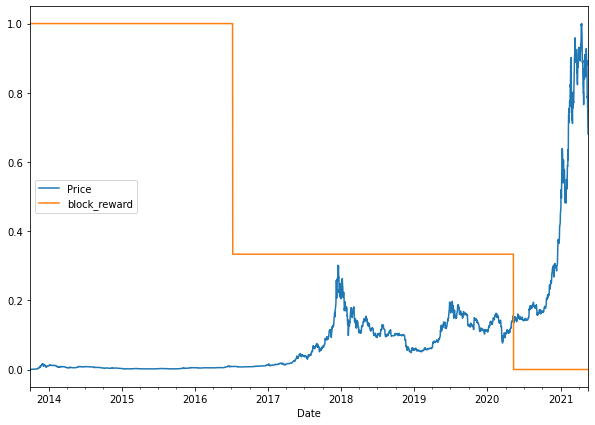

In [78]:
from sklearn.preprocessing import minmax_scale

scaled_prices_block_df = pd.DataFrame(minmax_scale(bitcoin_prices_block[["Price", "block_reward"]]),
                                      columns = bitcoin_prices_block.columns,
                                      index = bitcoin_prices_block.index)
scaled_prices_block_df.plot(figsize=(10,7));

# Make a Windowed dataset with pandas

In [79]:
HORIZON = 1
WINDOW_SIZE = 7

In [80]:
bitcoin_prices_windowed = bitcoin_prices_block.copy()


for i in range(WINDOW_SIZE):

  bitcoin_prices_windowed[f"Price+{i}"] = bitcoin_prices_block["Price"].shift(periods=i+1)

bitcoin_prices_windowed.head(10)

,Price,block_reward,Price+0,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6
Date,,,,,,,,,
2013-10-01,123.65499,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,25,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,25,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,25,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,25,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN
2013-10-06,120.65533,25,121.33866,118.67466,108.58483,125.45500,123.65499,NaN,NaN
2013-10-07,121.79500,25,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499,NaN
2013-10-08,123.03300,25,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499
2013-10-09,124.04900,25,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500


In [81]:
X = bitcoin_prices_windowed.dropna().drop("Price", axis=1).astype(np.float32)
y = bitcoin_prices_windowed.dropna()["Price"].astype(np.float32)

X.head()

,block_reward,Price+0,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6
Date,,,,,,,,
2013-10-08,25.0,121.794998,120.655327,121.338661,118.674660,108.584831,125.455002,123.654991
2013-10-09,25.0,123.032997,121.794998,120.655327,121.338661,118.674660,108.584831,125.455002
2013-10-10,25.0,124.049004,123.032997,121.794998,120.655327,121.338661,118.674660,108.584831
2013-10-11,25.0,125.961159,124.049004,123.032997,121.794998,120.655327,121.338661,118.674660
2013-10-12,25.0,125.279663,125.961159,124.049004,123.032997,121.794998,120.655327,121.338661


In [82]:
y.head()

Date
2013-10-08    123.032997
2013-10-09    124.049004
2013-10-10    125.961159
2013-10-11    125.279663
2013-10-12    125.927498
Name: Price, dtype: float32

In [83]:
split_size = int(0.8 * len(X))

X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]

len(X_train), len(y_train), len(X_test), len(y_test)

(2224, 2224, 556, 556)

# Model 6: Dense (Multivariate Time Series)

In [84]:
tf.random.set_seed(42)

model_6 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON)
], name="model_6_dense_multivariate")

model_6.compile(loss="mae",
                optimizer = tf.keras.optimizers.Adam())

model_6.fit(X_train,
            y_train,
            epochs=100,
            batch_size = 128,
            verbose=0,
            validation_data = (X_test, y_test),
            callbacks = [create_model_checkpoint(model_name = model_6.name)])

INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets
INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets
INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets
INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets
INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets
INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets
INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets
INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets
INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets
INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets
INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets
INFO:tensorflow:Assets written to: model_ex

In [85]:
model_6 = tf.keras.models.load_model("model_experiments/model_6_dense_multivariate")
model_6.evaluate(X_test, y_test)

18/18 [==============================] - 0s 2ms/step - loss: 567.5873


567.5873413085938

In [86]:
model_6_preds = tf.squeeze(model_6.predict(X_test))
model_6_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8836.276, 8763.8  , 9040.486, 8741.225, 8719.326, 8765.071,
       8661.102, 8496.891, 8463.231, 8521.585], dtype=float32)>

In [87]:
model_6_results = evaluate_preds(y_test,
                                 model_6_preds)
model_6_results

{'mae': 567.5874,
 'mape': 2.541387,
 'mase': 0.99709386,
 'mse': 1161688.4,
 'rmse': 1077.8165}

# Model 7: N-Beats algorithm

In [88]:
class NBeatsBlock(tf.keras.layers.Layer):

  def __init__(self, 
               input_size: int,
               theta_size: int,
               horizon: int,
               n_neurons: int,
               n_layers: int,
               **kwargs):
    
    super().__init__(**kwargs)
    self.input_size = input_size
    self.theta_size = theta_size
    self.horizon = horizon
    self.n_neurons = n_neurons
    self.n_layers = n_layers

    self.hidden = [tf.keras.layers.Dense(n_neurons, activation="relu") for _ in range(n_layers)]
    self.theta_layer = tf.keras.layers.Dense(theta_size, activation="linear", name="theta")

  def call(self, inputs):
    x = inputs

    for layer in self.hidden:
      x = layer(x)
    theta = self.theta_layer(x)

    backcast, forecast = theta[:, :self.input_size], theta[:, -self.horizon:]
    return backcast, forecast

In [89]:
dummy_nbeats_block_layer = NBeatsBlock(input_size= WINDOW_SIZE,
                                       theta_size = WINDOW_SIZE + HORIZON ,
                                       horizon = HORIZON,
                                       n_neurons = 128,
                                       n_layers = 4)

In [90]:
dummy_inputs = tf.expand_dims(tf.range(WINDOW_SIZE)+1, axis=0)
dummy_inputs

<tf.Tensor: shape=(1, 7), dtype=int32, numpy=array([[1, 2, 3, 4, 5, 6, 7]], dtype=int32)>

In [91]:
backcast, forecast = dummy_nbeats_block_layer(dummy_inputs)

print(f"Backcast: {tf.squeeze(backcast.numpy())}")
print(f"Forecast: {tf.squeeze(forecast.numpy())}")

Backcast: [ 0.19014978  0.83798355 -0.32870018  0.25159916 -0.47540277 -0.77836645
 -0.5299447 ]
Forecast: -0.7554212808609009


# Preparing data for the N-BEATS algorithm using tf.data

In [92]:
HORIZON = 1 
WINDOW_SIZE = 7

In [93]:
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [94]:
bitcoin_prices_nbeats = bitcoin_prices.copy()

for i in range(WINDOW_SIZE):
  bitcoin_prices_nbeats[f"Price+{i}"] = bitcoin_prices_nbeats["Price"].shift(periods=i+1)

bitcoin_prices_nbeats.head(10)

,Price,Price+0,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6
Date,,,,,,,,
2013-10-01,123.65499,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN
2013-10-06,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499,NaN,NaN
2013-10-07,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499,NaN
2013-10-08,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499
2013-10-09,124.04900,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500


In [95]:
X = bitcoin_prices_nbeats.dropna().drop("Price", axis=1).astype(np.float32)
y = bitcoin_prices_nbeats.dropna()["Price"].astype(np.float32)

split_size = int(0.8 * len(X))

X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]

len(X_train), len(y_train), len(X_test), len(y_test)

(2224, 2224, 556, 556)

In [96]:
train_features_dataset = tf.data.Dataset.from_tensor_slices(X_train)
train_labels_dataset = tf.data.Dataset.from_tensor_slices(y_train)

train_dataset = tf.data.Dataset.zip((train_features_dataset, train_labels_dataset))

test_features_dataset = tf.data.Dataset.from_tensor_slices(X_test)
test_labels_dataset = tf.data.Dataset.from_tensor_slices(y_test)

test_dataset = tf.data.Dataset.zip((test_features_dataset, test_labels_dataset))

# Batch and Prefetch
BATCH_SIZE = 1024
train_dataset = train_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

train_dataset, test_dataset

(<PrefetchDataset shapes: ((None, 7), (None,)), types: (tf.float32, tf.float32)>,
 <PrefetchDataset shapes: ((None, 7), (None,)), types: (tf.float32, tf.float32)>)

In [97]:
N_EPOCHS = 5000
N_NEURONS = 512
N_LAYERS = 4
N_STACKS = 30

INPUT_SIZE = WINDOW_SIZE * HORIZON
THETA_SIZE = INPUT_SIZE + HORIZON

INPUT_SIZE , THETA_SIZE

(7, 8)

In [98]:
# Building, compiling and fitting the N-BEATS algorithm

%%time 

tf.random.set_seed(42)

nbeats_block_layer = NBeatsBlock(input_size = INPUT_SIZE,
                                 theta_size = THETA_SIZE,
                                 horizon = HORIZON,
                                 n_neurons = N_NEURONS,
                                 n_layers = N_LAYERS,
                                 name ="InitialBlock")
stack_input = layers.Input(shape=(INPUT_SIZE), name ="stack_input")

backcast, forecast = nbeats_block_layer(stack_input)

residuals = layers.subtract([stack_input, backcast], name=f"subtact_00")

for i,_ in enumerate(range(N_STACKS-1)):
  
  backcast, block_forecast = NBeatsBlock(input_size = INPUT_SIZE,
                                         theta_size = THETA_SIZE,
                                         horizon = HORIZON,
                                         n_neurons = N_NEURONS,
                                         n_layers = N_LAYERS,
                                         name =f"NBeatsBLock_{i}")(residuals)
  residuals = layers.subtract([residuals, backcast], name=f"subtract_{i}")
  forecast = layers.add([forecast, block_forecast], name=f"add_{i}")

model_7 = tf.keras.Model(inputs=stack_input,
                         outputs=forecast,
                         name = "model_7_N-BEATS")

model_7.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())


model_7.fit(train_dataset,
            epochs = N_EPOCHS,
            validation_data =test_dataset,
            verbose = 0,
            callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss",
                                                        patience=200,
                                                        restore_best_weights=True),
                       tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",
                                                            patience=100,
                                                            verbose =1)])



Epoch 00263: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 00363: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
CPU times: user 1min 16s, sys: 3.88 s, total: 1min 19s
Wall time: 3min 1s


In [99]:
model_7.evaluate(test_dataset)

1/1 [==============================] - 0s 44ms/step - loss: 574.9291


574.9290771484375

In [100]:
model_7_preds = tf.squeeze(model_7.predict(test_dataset))

model_7_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8870.21 , 8811.155, 9010.131, 8784.04 , 8767.672, 8754.236,
       8636.387, 8559.061, 8493.805, 8514.98 ], dtype=float32)>

In [101]:
model_7_results = evaluate_preds(y_test,
                                 model_7_preds)
model_7_results

{'mae': 574.9291,
 'mape': 2.6765053,
 'mase': 1.0099912,
 'mse': 1151280.8,
 'rmse': 1072.9774}

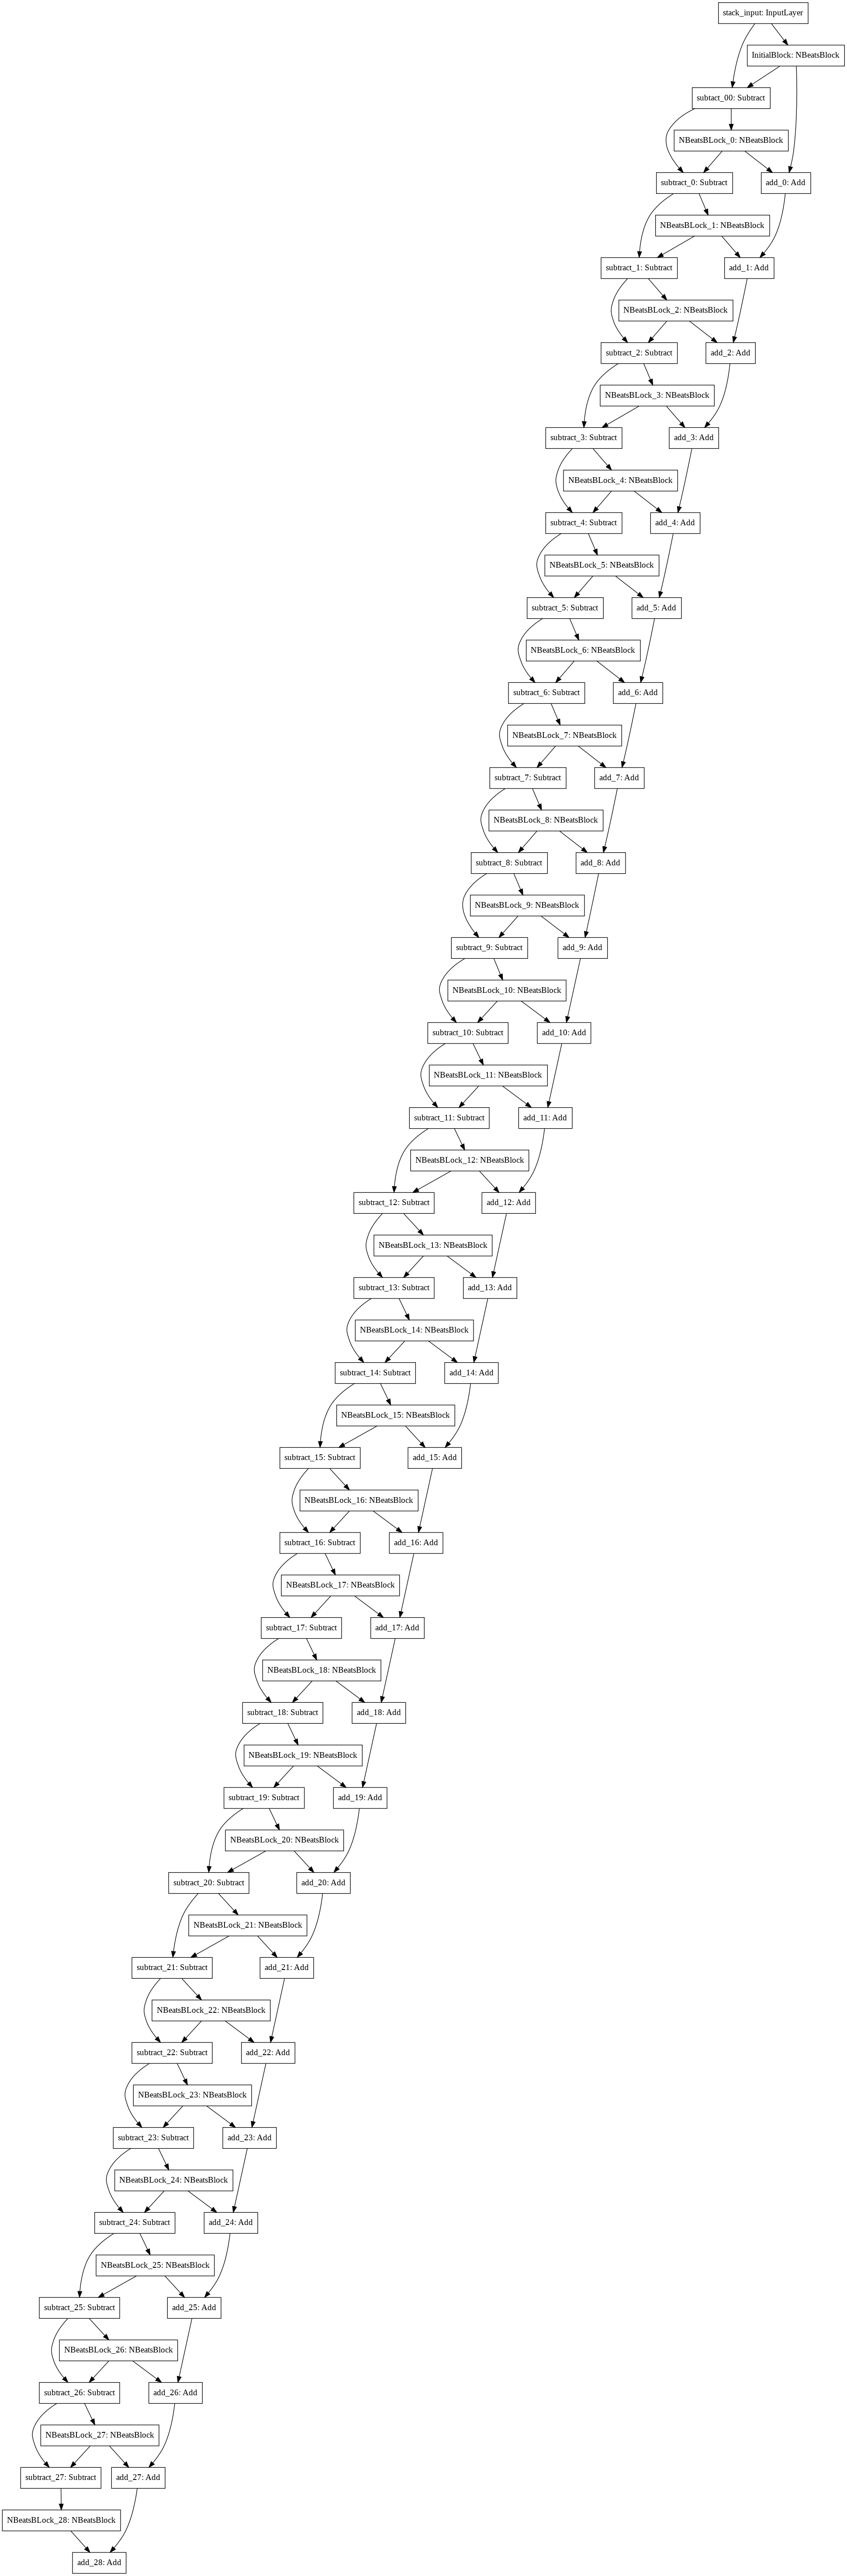

In [102]:
from tensorflow.keras.utils import plot_model

plot_model(model_7)

In [103]:
model_7.save(model_7.name)

INFO:tensorflow:Assets written to: model_7_N-BEATS/assets


INFO:tensorflow:Assets written to: model_7_N-BEATS/assets
/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


# Model 8: Creating an ensemble (stacking different models together)

In [104]:
def get_ensemble_models(horizon=HORIZON, 
                        train_data=train_dataset,
                        test_data=test_dataset,
                        num_iter=10, 
                        num_epochs=100, 
                        loss_fns=["mae", "mse", "mape"]):
  
  ensemble_models = []

  for i in range(num_iter):
    
    for loss_function in loss_fns:
      print(f"Optimizing model by reducing: {loss_function} for {num_epochs} epochs, model number: {i}")
      
      model = tf.keras.Sequential([        
        layers.Dense(128, kernel_initializer="he_normal", activation="relu"), 
        layers.Dense(128, kernel_initializer="he_normal", activation="relu"),
        layers.Dense(HORIZON) ])

      model.compile(loss=loss_function,
                    optimizer=tf.keras.optimizers.Adam(),
                    metrics=["mae", "mse"])
      
      # Fit model
      model.fit(train_data,
                epochs=num_epochs,
                verbose=0,
                validation_data=test_data,
                callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss",
                                                            patience=200,
                                                            restore_best_weights=True),
                           tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",
                                                                patience=100,
                                                                verbose=1)])
      
      
      ensemble_models.append(model)
  return ensemble_models

In [105]:
%%time
ensemble_models = get_ensemble_models(num_iter=5,
                                      num_epochs=1000)

Optimizing model by reducing: mae for 1000 epochs, model number: 0

Epoch 00682: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 00942: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Optimizing model by reducing: mse for 1000 epochs, model number: 0

Epoch 00483: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 00583: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Optimizing model by reducing: mape for 1000 epochs, model number: 0

Epoch 00165: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 00282: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 00382: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.
Optimizing model by reducing: mae for 1000 epochs, model number: 1
Optimizing model by reducing: mse for 1000 epochs, model number: 1

Epoch 00411: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 0

In [106]:
def make_ensemble_preds(ensemble_models, data):
  ensemble_preds =[]
  for model in ensemble_models:
    preds = model.predict(data)
    ensemble_preds.append(preds)
  return tf.constant(tf.squeeze(ensemble_preds))

In [107]:
ensemble_preds = make_ensemble_preds(ensemble_models,
                                     test_dataset)
ensemble_preds

<tf.Tensor: shape=(15, 556), dtype=float32, numpy=
array([[ 8790.542 ,  8762.841 ,  9018.679 , ..., 50061.965 , 49101.617 ,
        46410.727 ],
       [ 8789.786 ,  8743.026 ,  8997.182 , ..., 49026.145 , 48809.273 ,
        45600.92  ],
       [ 8732.519 ,  8719.164 ,  9094.258 , ..., 49907.414 , 47981.156 ,
        45304.36  ],
       ...,
       [ 8876.603 ,  8751.304 ,  9029.1875, ..., 49211.934 , 49275.246 ,
        46366.41  ],
       [ 8723.838 ,  8802.668 ,  9097.383 , ..., 49557.062 , 48491.117 ,
        45045.37  ],
       [ 8814.656 ,  8759.381 ,  9038.532 , ..., 49709.504 , 48033.79  ,
        45809.07  ]], dtype=float32)>

In [108]:
ensemble_results = evaluate_preds(y_test,
                                  np.median(ensemble_preds, axis=0))
ensemble_results

{'mae': 566.9501,
 'mape': 2.585912,
 'mase': 0.99597424,
 'mse': 1139539.6,
 'rmse': 1067.4923}

# Plotting the prediction intervals (uncertainty estimates) of our ensemble

In [109]:
def get_upper_lower(preds):
  std = tf.math.reduce_std(preds, axis=0)

  interval = 1.96 * std

  preds_mean = tf.reduce_mean(preds, axis=0)

  lower, upper = preds_mean - interval , preds_mean + interval

  return lower, upper

lower, upper = get_upper_lower(preds=ensemble_preds)

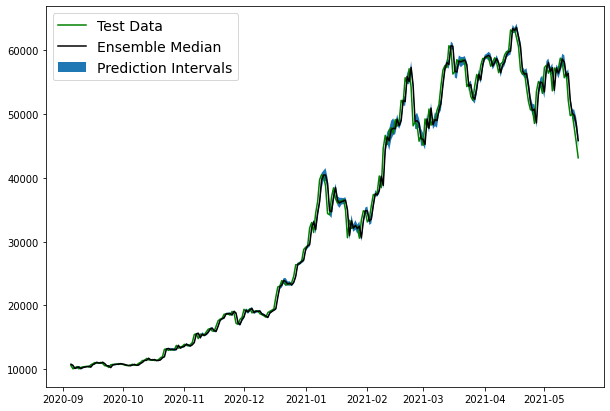

In [110]:
ensemble_median = np.median(ensemble_preds, axis=0)

offet=500
plt.figure(figsize=(10, 7))
plt.plot(X_test.index[offset:], y_test[offset:], "g", label="Test Data")
plt.plot(X_test.index[offset:], ensemble_median[offset:], "k-", label="Ensemble Median")
plt.fill_between(X_test.index[offset:],
                 (lower)[offset:],
                 (upper)[offset:], label="Prediction Intervals")
plt.legend(loc="upper left", fontsize=14);